In [1]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<h4>Problem1(a)</h4>

In [2]:
df=pd.read_csv("E:\MyCourses\CSC478ProgrammingMachineLearning\homework3\communities\communities.csv",na_values=['?'])
df

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.00,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.00,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.00,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.00,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.00,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,TempleTerracecity,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,...,0.00,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.09
1990,6,Seasidecity,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,...,0.00,0.53,0.25,0.17,0.10,0.00,0.02,0.37,0.20,0.45
1991,9,Waterburytown,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,...,0.02,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18,0.23
1992,25,Walthamcity,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,...,0.01,0.45,0.64,0.54,0.59,0.52,0.03,0.38,0.33,0.19


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
state,1994.0,28.683551,16.397553,1.0,12.00,34.00,42.00,56.0
population,1994.0,0.057593,0.126906,0.0,0.01,0.02,0.05,1.0
householdsize,1994.0,0.463395,0.163717,0.0,0.35,0.44,0.54,1.0
racepctblack,1994.0,0.179629,0.253442,0.0,0.02,0.06,0.23,1.0
racePctWhite,1994.0,0.753716,0.244039,0.0,0.63,0.85,0.94,1.0
...,...,...,...,...,...,...,...,...
PctSameState85,1994.0,0.651530,0.198221,0.0,0.56,0.70,0.79,1.0
LandArea,1994.0,0.065231,0.109459,0.0,0.02,0.04,0.07,1.0
PopDens,1994.0,0.232854,0.203092,0.0,0.10,0.17,0.28,1.0
PctUsePubTrans,1994.0,0.161685,0.229055,0.0,0.02,0.07,0.19,1.0


In [4]:
df.dropna(axis=0,how='any',inplace=True)
df

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.00,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.00,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.00,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.00,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.00,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,TempleTerracecity,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,...,0.00,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.09
1990,6,Seasidecity,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,...,0.00,0.53,0.25,0.17,0.10,0.00,0.02,0.37,0.20,0.45
1991,9,Waterburytown,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,...,0.02,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18,0.23
1992,25,Walthamcity,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,...,0.01,0.45,0.64,0.54,0.59,0.52,0.03,0.38,0.33,0.19


In [5]:
y=df.ViolentCrimesPerPop
X=df[df.columns.values[2:99]]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=33)

<h4>Problem1(b)</h4>

In [7]:
#define the standard linear regression
def standRegres(xArr,yArr):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws

In [8]:
ws=standRegres(X_train, y_train)
ws.A.ravel().shape

(97,)

In [9]:
xMat=np.mat(X_train)
yMat=np.mat(y_train)
yPred=xMat*ws
yPred_arr=yPred.A.ravel()
ws.shape

(97, 1)

In [10]:
#Compute RMSE on training data
err=abs(yPred_arr-np.array(y_train))
err
len(np.array(X_train.columns.values))

97

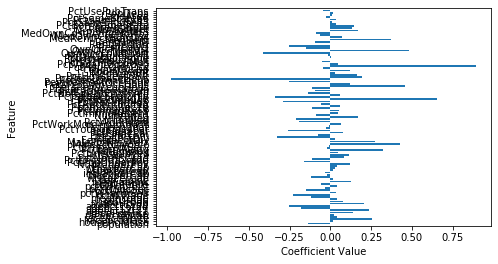

In [11]:
def plot_coefficients(coef, n_features, feature_names):
    plt.barh(range(n_features), coef, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Coefficient Value")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_coefficients(ws.A.ravel(), len(np.array(X_train.columns)), np.array(X_train.columns.values))

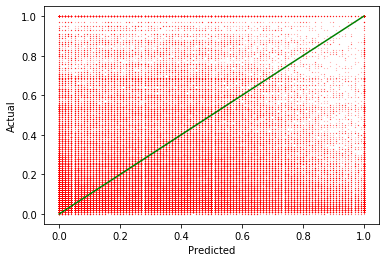

In [12]:
#plot the predicted against actual
plt.plot(X_train, y_train,'ro', markersize=.1)
plt.plot([0,1],[0,1], 'g-')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [13]:
def cross_validate1(X, y, n, verbose=False):
    # model: regression model to be trained
    # X: the data matrix
    # y: the target variable array
    # n: the number of fold for x-validation
    # Returns mean RMSE across all folds
    
    from sklearn.model_selection import KFold
    kf = KFold(n_splits=n, random_state=22,shuffle=True)
    xval_err = 0
    f = 1
    for train,test in kf.split(X):
        ws=standRegres(X[train],y[train])
        p = (np.mat(X[test])*ws).A.ravel()
        e = p-y[test]
        rmse = np.sqrt(np.dot(e,e)/len(X[test]))
        if verbose:
            print("Fold %2d RMSE: %.4f" % (f, rmse))
        xval_err += rmse
        f += 1
    return xval_err/n

In [182]:
rmse_10 = cross_validate1(np.array(X_train), np.array(y_train), 10,verbose=True)
rmse_10

Fold  1 RMSE: 0.1330
Fold  2 RMSE: 0.1349
Fold  3 RMSE: 0.1288
Fold  4 RMSE: 0.1348
Fold  5 RMSE: 0.1347
Fold  6 RMSE: 0.1404
Fold  7 RMSE: 0.1427
Fold  8 RMSE: 0.1227
Fold  9 RMSE: 0.1325
Fold 10 RMSE: 0.1665


0.13709769960455429

<h4>Problem1(c)</h4>

In [15]:
from sklearn import feature_selection
fs=feature_selection.SelectPercentile(feature_selection.f_regression,percentile=30)
X_fs=fs.fit_transform(X, y)

In [16]:
from sklearn.model_selection import train_test_split
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_fs, y, test_size=.2, random_state=33)

In [17]:
np.set_printoptions(suppress=True,precision=2,linewidth=120)
print(list(X.columns))
print(fs.get_support())
print(fs.scores_)

['population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup', 'PersPerOccupHous', 'Pers

In [209]:
X_fs_columns=X.columns[fs.get_support()].values
X_fs_columns

array(['racepctblack', 'racePctWhite', 'medIncome', 'pctWInvInc', 'pctWPubAsst', 'medFamInc', 'NumUnderPov',
       'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctUnemployed', 'MalePctDivorce', 'FemalePctDiv',
       'TotalPctDiv', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'NumIlleg', 'PctIlleg',
       'PctLargHouseFam', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'HousVacant', 'PctHousOwnOcc',
       'PctVacantBoarded', 'PctHousNoPhone', 'NumInShelters'], dtype=object)

In [19]:
for i in range(len(X_fs_columns)):
    print("%16s %5.3f" % (X_fs_columns[i],fs.scores_[i]))

    racepctblack 310.220
    racePctWhite 2.433
       medIncome 1330.478
      pctWInvInc 1766.241
     pctWPubAsst 2.821
       medFamInc 187.068
     NumUnderPov 7.309
  PctPopUnderPov 47.956
 PctLess9thGrade 19.845
    PctNotHSGrad 9.032
   PctUnemployed 301.999
  MalePctDivorce 13.494
    FemalePctDiv 437.445
     TotalPctDiv 205.337
      PctFam2Par 47.803
     PctKids2Par 991.107
PctYoungKids2Par 28.127
     PctTeen2Par 985.088
        NumIlleg 19.483
        PctIlleg 476.151
 PctLargHouseFam 281.893
 PctPersOwnOccup 91.196
PctPersDenseHous 163.468
  PctHousLess3BR 16.581
      HousVacant 49.394
   PctHousOwnOcc 32.298
PctVacantBoarded 126.743
  PctHousNoPhone 498.774
   NumInShelters 748.346


<h4>Now train models using selected features</h4>

In [21]:
#create linear regression object and train the model
linreg=LinearRegression()
linreg.fit(X_train_fs, np.array(y_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
for i in range(10):
    pred=linreg.predict([X_train_fs[i]])
    print("%2d \t %2.2f \t %2.2f"%(i,pred,np.array(y_train)[i]))

 0 	 0.29 	 0.31
 1 	 0.29 	 0.05
 2 	 0.00 	 0.22
 3 	 -0.02 	 0.10
 4 	 0.27 	 0.31
 5 	 0.06 	 0.19
 6 	 0.38 	 0.52
 7 	 0.07 	 0.08
 8 	 0.23 	 0.22
 9 	 0.15 	 0.71


<h4>Compute RMSE on training data</h4>

In [23]:
p=linreg.predict(X_train_fs)
y_train_arr=np.array(y_train)
err=abs(p-y_train_arr)
err

array([0.02, 0.24, 0.22, ..., 0.3 , 0.06, 0.04])

In [24]:
total_error=np.dot(err,err)
rmse_train=np.sqrt(total_error/len(p))
print("RMSE on training Data: ",rmse_train)

RMSE on training Data:  0.13531841972798095


In [25]:
print('Regression Cofficients: \n',linreg.coef_)

Regression Cofficients: 
 [ 0.2   0.03 -0.   -0.1   0.12  0.14  0.04 -0.08 -0.11  0.04 -0.02  0.38  0.21 -0.52 -0.01 -0.27 -0.03 -0.01 -0.27
  0.19 -0.07 -0.29  0.26  0.11  0.22  0.35  0.07 -0.01  0.17]


In [26]:
for i in range(len(X_fs_columns)):
    print("%10s %3.2f" % (X_fs_columns[i],linreg.coef_[i]))

racepctblack 0.20
racePctWhite 0.03
 medIncome -0.00
pctWInvInc -0.10
pctWPubAsst 0.12
 medFamInc 0.14
NumUnderPov 0.04
PctPopUnderPov -0.08
PctLess9thGrade -0.11
PctNotHSGrad 0.04
PctUnemployed -0.02
MalePctDivorce 0.38
FemalePctDiv 0.21
TotalPctDiv -0.52
PctFam2Par -0.01
PctKids2Par -0.27
PctYoungKids2Par -0.03
PctTeen2Par -0.01
  NumIlleg -0.27
  PctIlleg 0.19
PctLargHouseFam -0.07
PctPersOwnOccup -0.29
PctPersDenseHous 0.26
PctHousLess3BR 0.11
HousVacant 0.22
PctHousOwnOcc 0.35
PctVacantBoarded 0.07
PctHousNoPhone -0.01
NumInShelters 0.17


In [27]:
def plot_coefficients(model, n_features, feature_names):
    plt.barh(range(n_features), model.coef_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Coefficient Value")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

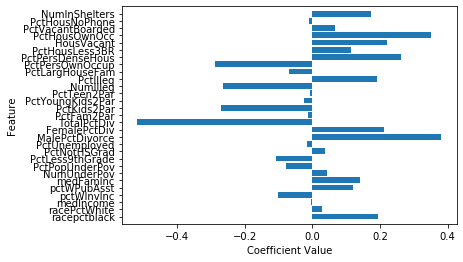

In [28]:
plot_coefficients(linreg, len(X_fs_columns), X_fs_columns)

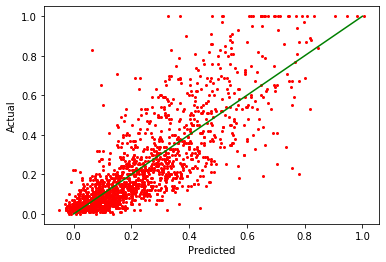

In [29]:
#plot the predicted against actual
plt.plot(p, y_train,'ro', markersize=2)
plt.plot([0,1],[0,1], 'g-')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<h4>Compute RMSE using 10-fold cross-validation</h4>

In [30]:
def cross_validate(model, X, y, n, verbose=False):
    # model: regression model to be trained
    # X: the data matrix
    # y: the target variable array
    # n: the number of fold for x-validation
    # Returns mean RMSE across all folds
    
    from sklearn.model_selection import KFold
    kf = KFold(n_splits=n, random_state=22,shuffle=True)
    xval_err = 0
    f = 1
    for train,test in kf.split(X):
        model.fit(X[train],y[train])
        p = model.predict(X[test])
        e = p-y[test]
        rmse = np.sqrt(np.dot(e,e)/len(X[test]))
        if verbose:
            print("Fold %2d RMSE: %.4f" % (f, rmse))
        xval_err += rmse
        f += 1
    return xval_err/n

In [31]:
rmse_10cv = cross_validate(linreg, X_train_fs, np.array(y_train), 10,verbose=True)
rmse_10cv 

Fold  1 RMSE: 0.1328
Fold  2 RMSE: 0.1369
Fold  3 RMSE: 0.1321
Fold  4 RMSE: 0.1335
Fold  5 RMSE: 0.1333
Fold  6 RMSE: 0.1470
Fold  7 RMSE: 0.1399
Fold  8 RMSE: 0.1237
Fold  9 RMSE: 0.1369
Fold 10 RMSE: 0.1678


0.13839315950225628

In [32]:
p_test_fs=linreg.predict(X_test_fs)
y_test_fs_arr=np.array(y_test_fs)
err_test=abs(p_test_fs-y_test_fs_arr)
err_test[:10]

array([0.22, 0.06, 0.04, 0.14, 0.08, 0.22, 0.15, 0.08, 0.02, 0.03])

In [33]:
total_test_error=np.dot(err_test,err_test)
rmse_test=np.sqrt(total_error/len(p_test_fs))
print("RMSE on the test data: ",total_test_error)

RMSE on the test data:  7.818017037185425


<h4>problem1(d)</h4>

<h4>Ridge regression</h4>

In [166]:
def AlphaForRidge_Rmse(X, y, alpha):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X,y)
    rmse_5cv = cross_validate(ridge, X, y, 5, verbose=False)
    return rmse_5cv

when alpha is 0.00, RMSE on 5-fold CV: 0.13865112
when alpha is 0.05, RMSE on 5-fold CV: 0.13854348
when alpha is 0.10, RMSE on 5-fold CV: 0.13848894
when alpha is 0.15, RMSE on 5-fold CV: 0.13844931
when alpha is 0.20, RMSE on 5-fold CV: 0.13841852
when alpha is 0.25, RMSE on 5-fold CV: 0.13839389
when alpha is 0.30, RMSE on 5-fold CV: 0.13837385
when alpha is 0.35, RMSE on 5-fold CV: 0.13835738
when alpha is 0.41, RMSE on 5-fold CV: 0.13834378
when alpha is 0.46, RMSE on 5-fold CV: 0.13833255
when alpha is 0.51, RMSE on 5-fold CV: 0.13832330
when alpha is 0.56, RMSE on 5-fold CV: 0.13831574
when alpha is 0.61, RMSE on 5-fold CV: 0.13830964
when alpha is 0.66, RMSE on 5-fold CV: 0.13830481
when alpha is 0.71, RMSE on 5-fold CV: 0.13830110
when alpha is 0.76, RMSE on 5-fold CV: 0.13829837
when alpha is 0.81, RMSE on 5-fold CV: 0.13829652
when alpha is 0.86, RMSE on 5-fold CV: 0.13829545
when alpha is 0.91, RMSE on 5-fold CV: 0.13829509
when alpha is 0.96, RMSE on 5-fold CV: 0.13829536


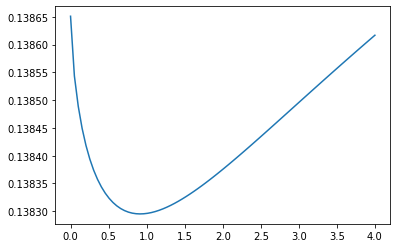

In [167]:
x_axis = np.linspace(0,4,80)
y_axis=[]
for i in x_axis:
    y_err=AlphaForRidge_Rmse(X_train_fs, y_train_arr, i)
    y_axis.append(y_err)
    print("when alpha is %.2f, RMSE on 5-fold CV: %.8f"%(i, y_err))
plt.plot(x_axis,y_axis)

In [168]:
# based one calculation above, we choose alpha to be 0.91
ridge = Ridge(alpha=0.91)
# Train the model using the training set
ridge.fit(X_train_fs,y_train_arr)

Ridge(alpha=0.91, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [169]:
# Compute RMSE on test data
p = ridge.predict(np.array(X_test_fs))
err = p-y_test_fs_arr
total_error = np.dot(err,err)
rmse_test = np.sqrt(total_error/len(p))

method_name = 'Ridge Regression'
print('Method: %s' %method_name)
print('RMSE on testing data: %.6f' %rmse_test)

Method: Ridge Regression
RMSE on testing data: 0.139507


In [180]:
print('ridge score on training data is %.6f: '% ridge.score(X_train_fs, y_train_arr))
print('ridge score on testing data is %.6f: '% ridge.score(X_test_fs, y_test_fs_arr))

ridge score on training data is 0.651514: 
ridge score on testing data is 0.677555: 


<h4>lasso regression</h4>

In [170]:
def AlphaForLasso_Rmse(X, y, alpha):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X,y)
    rmse_5cv = cross_validate(lasso, X, y, 5, verbose=False)
    return rmse_5cv

when alpha is 1.00, RMSE on 5-fold CV: 0.22965102
when alpha is 1.08, RMSE on 5-fold CV: 0.22965102
when alpha is 1.16, RMSE on 5-fold CV: 0.22965102
when alpha is 1.24, RMSE on 5-fold CV: 0.22965102
when alpha is 1.33, RMSE on 5-fold CV: 0.22965102
when alpha is 1.41, RMSE on 5-fold CV: 0.22965102
when alpha is 1.49, RMSE on 5-fold CV: 0.22965102
when alpha is 1.57, RMSE on 5-fold CV: 0.22965102
when alpha is 1.65, RMSE on 5-fold CV: 0.22965102
when alpha is 1.73, RMSE on 5-fold CV: 0.22965102
when alpha is 1.82, RMSE on 5-fold CV: 0.22965102
when alpha is 1.90, RMSE on 5-fold CV: 0.22965102
when alpha is 1.98, RMSE on 5-fold CV: 0.22965102
when alpha is 2.06, RMSE on 5-fold CV: 0.22965102
when alpha is 2.14, RMSE on 5-fold CV: 0.22965102
when alpha is 2.22, RMSE on 5-fold CV: 0.22965102
when alpha is 2.31, RMSE on 5-fold CV: 0.22965102
when alpha is 2.39, RMSE on 5-fold CV: 0.22965102
when alpha is 2.47, RMSE on 5-fold CV: 0.22965102
when alpha is 2.55, RMSE on 5-fold CV: 0.22965102


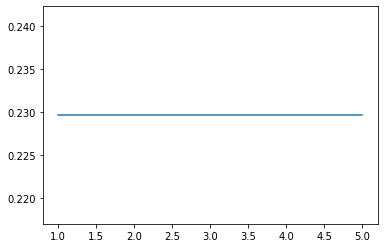

In [195]:
x_axis = np.linspace(1,5,50)
y_axis=[]
for i in x_axis:
    y_err=AlphaForLasso_Rmse(X_train_fs, y_train_arr, i)
    y_axis.append(y_err)
    print("when alpha is %.2f, RMSE on 5-fold CV: %.8f"%(i, y_err))
plt.plot(x_axis,y_axis)

In [196]:
# based one calculation above, we choose alpha to be 1
lasso = Lasso(alpha=1)
# Train the model using the training set
lasso.fit(X_train_fs,y_train_arr)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [197]:
# Compute RMSE on test data
p = lasso.predict(np.array(X_test_fs))
err = p-y_test_fs_arr
total_error = np.dot(err,err)
rmse_test = np.sqrt(total_error/len(p))

method_name = 'Ridge Regression'
print('Method: %s' %method_name)
print('RMSE on testing data: %.6f' %rmse_test)

Method: Ridge Regression
RMSE on testing data: 0.245682


In [198]:
print('lasso score on training data is %.6f: '% lasso.score(X_train_fs, y_train_arr))
print('lasso score on testing data is %.6f: '% lasso.score(X_test_fs, y_test_fs_arr))

lasso score on training data is 0.000000: 
lasso score on testing data is -0.000023: 


<h4>Problem1(e)</h4>

In [249]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [253]:
scaler = StandardScaler()
X_train_fs_standard = scaler.fit_transform(X_train_fs)
sgd_reg = SGDRegressor()

In [261]:
param_dist = {
        'alpha':np.linspace(0.01,2,20),
        'penalty':['l1','l2'],
        }
grid_search = GridSearchCV(sgd_reg, param_dist, cv=5,
                          scoring='neg_mean_squared_error')
 
grid_search.fit(X_train_fs_standard, y_train_fs)
best_estimator = grid_search.best_estimator_
print(best_estimator)

SGDRegressor(alpha=0.21947368421052632, average=False, early_stopping=False,
             epsilon=0.1, eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)


In [263]:
pred=best_estimator.predict(X_test_fs)
pred

array([0.35, 0.21, 0.2 , 0.25, 0.25, 0.29, 0.24, 0.24, 0.21, 0.19, 0.23, 0.21, 0.2 , 0.35, 0.2 , 0.2 , 0.21, 0.21,
       0.21, 0.2 , 0.19, 0.27, 0.2 , 0.22, 0.25, 0.35, 0.23, 0.31, 0.2 , 0.23, 0.21, 0.19, 0.2 , 0.21, 0.21, 0.26,
       0.3 , 0.25, 0.36, 0.2 , 0.23, 0.2 , 0.2 , 0.22, 0.24, 0.22, 0.22, 0.19, 0.3 , 0.29, 0.24, 0.24, 0.33, 0.22,
       0.21, 0.21, 0.27, 0.2 , 0.27, 0.22, 0.23, 0.19, 0.24, 0.3 , 0.22, 0.21, 0.2 , 0.2 , 0.26, 0.22, 0.21, 0.2 ,
       0.23, 0.23, 0.23, 0.23, 0.24, 0.19, 0.25, 0.2 , 0.19, 0.26, 0.19, 0.19, 0.22, 0.29, 0.31, 0.26, 0.27, 0.23,
       0.23, 0.2 , 0.23, 0.25, 0.2 , 0.21, 0.25, 0.26, 0.2 , 0.24, 0.21, 0.21, 0.24, 0.2 , 0.2 , 0.21, 0.25, 0.2 ,
       0.19, 0.27, 0.21, 0.2 , 0.23, 0.29, 0.19, 0.23, 0.22, 0.19, 0.26, 0.22, 0.2 , 0.19, 0.32, 0.23, 0.25, 0.23,
       0.19, 0.21, 0.21, 0.27, 0.31, 0.21, 0.2 , 0.3 , 0.27, 0.23, 0.25, 0.18, 0.29, 0.2 , 0.2 , 0.2 , 0.22, 0.21,
       0.22, 0.26, 0.2 , 0.23, 0.27, 0.2 , 0.2 , 0.26, 0.24, 0.21, 0.22, 0.2 , 0

In [264]:
test_score = best_estimator.score(X_test_fs,y_test_fs)
test_score

0.2263975575780015

In [271]:
sgd_reg = SGDRegressor(penalty='elasticnet')
param_dist = {
        'alpha':np.linspace(0.01,2,20),
    'l1_ratio':np.linspace(0,1,20)
        }
grid_search = GridSearchCV(sgd_reg, param_dist, cv=5, scoring='neg_mean_squared_error')
 
grid_search.fit(X_train_fs_standard, y_train_fs)
best_estimator = grid_search.best_estimator_
print(best_estimator)

SGDRegressor(alpha=0.11473684210526315, average=False, early_stopping=False,
             epsilon=0.1, eta0=0.01, fit_intercept=True, l1_ratio=0.0,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='elasticnet', power_t=0.25,
             random_state=None, shuffle=True, tol=0.001,
             validation_fraction=0.1, verbose=0, warm_start=False)


In [272]:
test_score = best_estimator.score(X_test_fs,y_test_fs)
test_score

0.2280452411181293